In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
import glob
import random
from PIL import Image


In [2]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset


In [3]:
dframe = pd.read_csv(
    "D:\Lab on python\Lab_1_var_4\Lab2\csv_files\datasets.csv", delimiter=",", names=["Absolute path", "Relative path", "Class"]
)
img_list=dframe["Absolute path"].tolist()
random.shuffle(img_list)
print(img_list[:5])


['D:\\Lab on python\\Lab_1_var_4\\dataset\\rose\\0958.jpg', 'D:\\Lab on python\\Lab_1_var_4\\dataset\\rose\\0246.jpg', 'D:\\Lab on python\\Lab_1_var_4\\dataset\\tulip\\0473.jpg', 'D:\\Lab on python\\Lab_1_var_4\\dataset\\tulip\\0814.jpg', 'D:\\Lab on python\\Lab_1_var_4\\dataset\\tulip\\0012.jpg']


In [4]:
img_label=[]
for i in range(len(img_list)):
    img_label.append(os.path.basename(os.path.dirname(img_list[i])))
print(img_label[:5])

['rose', 'rose', 'tulip', 'tulip', 'tulip']


In [5]:
train_list = img_list[0 : int(len(img_list) * 0.8)]
test_list = img_list[int(len(img_list) * 0.8) : int(len(img_list) * 0.9)]
val_list = img_list[int(len(img_list) * 0.9) : int(len(img_list))]
print(len(train_list ))
print(len(test_list))
print(len(val_list))



1628
204
204


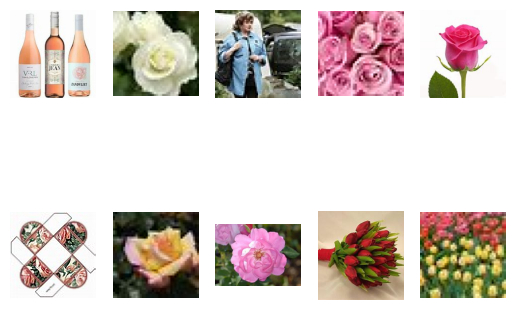

In [32]:
random_idx = np.random.randint(1,len(img_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(img_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

In [33]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = os.path.basename(os.path.dirname(img_list[i]))
        if label == 'rose':
            label=0
        elif label == 'tulip':
            label=1
        #print(label)  
            
        return img_transformed,label  

In [37]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [40]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=100, 
                                           shuffle=True )

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=100, 
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=100, 
                                         shuffle=False)

In [41]:
print(len(train_data), len(train_loader))
train_data[0][0].shape
for i in range(len(train_data)):
    if (train_data[i][0].shape!=train_data[0][0].shape):
        #train_data[i][0] = train_data[i][0][:3, :, :]
        print(train_data[i][0].shape)

# print(len(train_data))

1628 17
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])
torch.Size([4, 224, 224])


In [26]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)
model.train()

Cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

In [28]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [29]:
epochs = 10

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
     
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label)
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

RuntimeError: stack expects each tensor to be equal size, but got [3, 224, 224] at entry 0 and [4, 224, 224] at entry 10

In [77]:
rose_probs = []
model.eval()
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        rose_probs += list(zip(list(fileid), preds_list))
rose_probs.sort(key = lambda x : int(x[0]))
rose_probs

[(tensor(0), 0.45305922627449036),
 (tensor(0), 0.5118167400360107),
 (tensor(0), 0.520839512348175),
 (tensor(0), 0.43267661333084106),
 (tensor(0), 0.4987318515777588),
 (tensor(0), 0.46002328395843506),
 (tensor(1), 0.5274025201797485),
 (tensor(1), 0.5071537494659424),
 (tensor(1), 0.405519962310791),
 (tensor(1), 0.5298426151275635)]